In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [2]:
df=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/datatraining .csv", )

In [3]:
df.head()

,id,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,04/02/15 17:51,23.18,27.2720,426.0,721.25,0.004793,1
1,2,04/02/15 17:51,23.15,27.2675,429.5,714.00,0.004783,1
2,3,04/02/15 17:53,23.15,27.2450,426.0,713.50,0.004779,1
3,4,04/02/15 17:54,23.15,27.2000,426.0,708.25,0.004772,1
4,5,04/02/15 17:55,23.10,27.2000,426.0,704.50,0.004757,1


In [4]:
df.isnull().sum()

id               0
date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [5]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
id,1,-0.442176,0.642502,-0.12196,0.122284,0.504377,-0.0981552
Temperature,-0.442176,1,-0.141759,0.649942,0.559894,0.151762,0.53822
Humidity,0.642502,-0.141759,1,0.0378279,0.439023,0.955198,0.132964
Light,-0.12196,0.649942,0.0378279,1,0.664022,0.23042,0.907352
CO2,0.122284,0.559894,0.439023,0.664022,1,0.626556,0.712235
HumidityRatio,0.504377,0.151762,0.955198,0.23042,0.626556,1,0.300282
Occupancy,-0.0981552,0.53822,0.132964,0.907352,0.712235,0.300282,1


In [6]:
df['Occupancy'].value_counts()

0    6414
1    1729
Name: Occupancy, dtype: int64

In [7]:
df['Occupancy'].value_counts()

0    6414
1    1729
Name: Occupancy, dtype: int64

In [8]:
#Create a new dataframe with only the division of date and hour
df1=pd.DataFrame({
    'date': pd.to_datetime(df['date']).dt.date,
    'time': pd.to_datetime(df['date']).dt.hour})

In [9]:
#Adding teh previous dataframe to the main dataframe
df['date']=df1['date']
df['Hour']=df1['time']

In [10]:
#The new dataframe with date and time splitted
df.head()

,id,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Hour
0,1,2015-04-02,23.18,27.2720,426.0,721.25,0.004793,1,17
1,2,2015-04-02,23.15,27.2675,429.5,714.00,0.004783,1,17
2,3,2015-04-02,23.15,27.2450,426.0,713.50,0.004779,1,17
3,4,2015-04-02,23.15,27.2000,426.0,708.25,0.004772,1,17
4,5,2015-04-02,23.10,27.2000,426.0,704.50,0.004757,1,17


In [11]:
#Adjusting the order of the column
df=df[['id', 'date', 'Hour', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']]

In [12]:
df.head()

,id,date,Hour,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,2015-04-02,17,23.18,27.2720,426.0,721.25,0.004793,1
1,2,2015-04-02,17,23.15,27.2675,429.5,714.00,0.004783,1
2,3,2015-04-02,17,23.15,27.2450,426.0,713.50,0.004779,1
3,4,2015-04-02,17,23.15,27.2000,426.0,708.25,0.004772,1
4,5,2015-04-02,17,23.10,27.2000,426.0,704.50,0.004757,1


In [13]:
#Add the column with the name of the day
df['date'] = pd.to_datetime(df['date'], format='%Y-%d-%m')

df['DayName'] = df['date'].dt.weekday_name

In [14]:
#Adjusting the order of the column
df=df[['id', 'date', 'DayName', 'Hour', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']]

In [15]:
df.head()

,id,date,DayName,Hour,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,2015-02-04,Wednesday,17,23.18,27.2720,426.0,721.25,0.004793,1
1,2,2015-02-04,Wednesday,17,23.15,27.2675,429.5,714.00,0.004783,1
2,3,2015-02-04,Wednesday,17,23.15,27.2450,426.0,713.50,0.004779,1
3,4,2015-02-04,Wednesday,17,23.15,27.2000,426.0,708.25,0.004772,1
4,5,2015-02-04,Wednesday,17,23.10,27.2000,426.0,704.50,0.004757,1


In [16]:
#Add a new column for the boolean variable IsWorkDay, this feature is 1 if the day is a work day, 0 otherwise
df["IsWorkDay"] = np.nan
df['IsWorkDay']=df['IsWorkDay'].astype(bool).astype(int)

In [17]:
#Fill the feature IsWorkDay with the corrsponding 1 or 0
for index, row in df.iterrows():
    if row["DayName"]!="Saturday" and row["DayName"]!="Sunday":
        df.loc[index, "IsWorkDay"] = 1
    else:
        df.loc[index, "IsWorkDay"] = 0

In [18]:
#Adjusting the order of the column
df=df[['id', 'date', 'DayName', 'IsWorkDay', 'Hour', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']]

In [19]:
#Drop the column id because is useless for us
df.drop(['id'], axis=1, inplace =True)

In [20]:
#Final attributes of our cleaned dataset
df.head()

,date,DayName,IsWorkDay,Hour,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04,Wednesday,1,17,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04,Wednesday,1,17,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04,Wednesday,1,17,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04,Wednesday,1,17,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04,Wednesday,1,17,23.10,27.2000,426.0,704.50,0.004757,1


In [21]:
#Add a new column for the variable IsWorkHour, this feature is 1 if the hour is a work hour,
#0 if it isn't a work hour and 2 if we have the doubt, so in the boundary values 
df["IsWorkHour"] = np.nan
df['IsWorkHour']=df['IsWorkHour'].astype(bool).astype(int)

In [22]:
#Fill the feature IsWorkHour with the corrsponding 0, 1 or 2
for index, row in df.iterrows():
    if row["Hour"]==13 or row["Hour"]==7 or row["Hour"]==18:
        df.loc[index, "IsWorkHour"] = 2 #could be both a work hour or not
    elif row["Hour"]<7 or row["Hour"]>18:
        df.loc[index, "IsWorkHour"] = 0 #is not a work hour
    else:
        df.loc[index, "IsWorkHour"] = 1 #is a work hour

In [23]:
#Adjusting the order of the column
df=df[['date', 'DayName', 'IsWorkDay', 'Hour', 'IsWorkHour', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']]

In [24]:
#test for see if everything works
df[1300:3000]

,date,DayName,IsWorkDay,Hour,IsWorkHour,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1300,2015-02-05,Thursday,1,15,1,22.500,27.600,460.0,1085.000000,0.004654,1
1301,2015-02-05,Thursday,1,15,1,22.500,27.700,460.0,1084.000000,0.004671,1
1302,2015-02-05,Thursday,1,15,1,22.500,27.600,436.5,1076.250000,0.004654,1
1303,2015-02-05,Thursday,1,15,1,22.500,27.330,460.0,1060.666667,0.004608,1
1304,2015-02-05,Thursday,1,15,1,22.550,27.445,449.5,1051.500000,0.004642,1
...,...,...,...,...,...,...,...,...,...,...,...
2995,2015-02-06,Friday,1,19,0,20.500,19.340,0.0,489.500000,0.002877,0
2996,2015-02-06,Friday,1,19,0,20.445,19.290,0.0,488.000000,0.002860,0
2997,2015-02-06,Friday,1,19,0,20.390,19.290,0.0,484.500000,0.002850,0
2998,2015-02-06,Friday,1,19,0,20.390,19.245,0.0,485.500000,0.002843,0


In [25]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,IsWorkDay,Hour,IsWorkHour,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
IsWorkDay,1,-0.0108276,-0.0318844,0.418657,0.108551,0.279519,0.394834,0.243146,0.384072
Hour,-0.0108276,1,0.126511,0.260361,0.0171345,0.084507,0.209669,0.0962705,0.0796298
IsWorkHour,-0.0318844,0.126511,1,0.365574,0.00531316,0.453609,0.330137,0.110203,0.358184
Temperature,0.418657,0.260361,0.365574,1,-0.141759,0.649942,0.559894,0.151762,0.53822
Humidity,0.108551,0.0171345,0.00531316,-0.141759,1,0.0378279,0.439023,0.955198,0.132964
Light,0.279519,0.084507,0.453609,0.649942,0.0378279,1,0.664022,0.23042,0.907352
CO2,0.394834,0.209669,0.330137,0.559894,0.439023,0.664022,1,0.626556,0.712235
HumidityRatio,0.243146,0.0962705,0.110203,0.151762,0.955198,0.23042,0.626556,1,0.300282
Occupancy,0.384072,0.0796298,0.358184,0.53822,0.132964,0.907352,0.712235,0.300282,1


In [26]:
df1=df.groupby(['date', 'Hour']).mean()

In [27]:
df1.head()

IsWorkDay  IsWorkHour  Temperature   Humidity       Light  \
date       Hour                                                              
2015-02-04 17          1.0         1.0    23.125556  27.220500  423.277778   
           18          1.0         2.0    22.626528  27.388278   48.875000   
           19          1.0         0.0    22.065055  27.181093    0.000000   
           20          1.0         0.0    21.676780  26.755593    0.000000   
           21          1.0         0.0    21.478931  25.911694    0.000000   

                        CO2  HumidityRatio  Occupancy  
date       Hour                                        
2015-02-04 17    705.833333       0.004768   1.000000  
           18    655.727778       0.004654   0.116667  
           19    572.398907       0.004462   0.000000  
           20    521.048023       0.004288   0.000000  
           21    493.798611       0.004102   0.000000

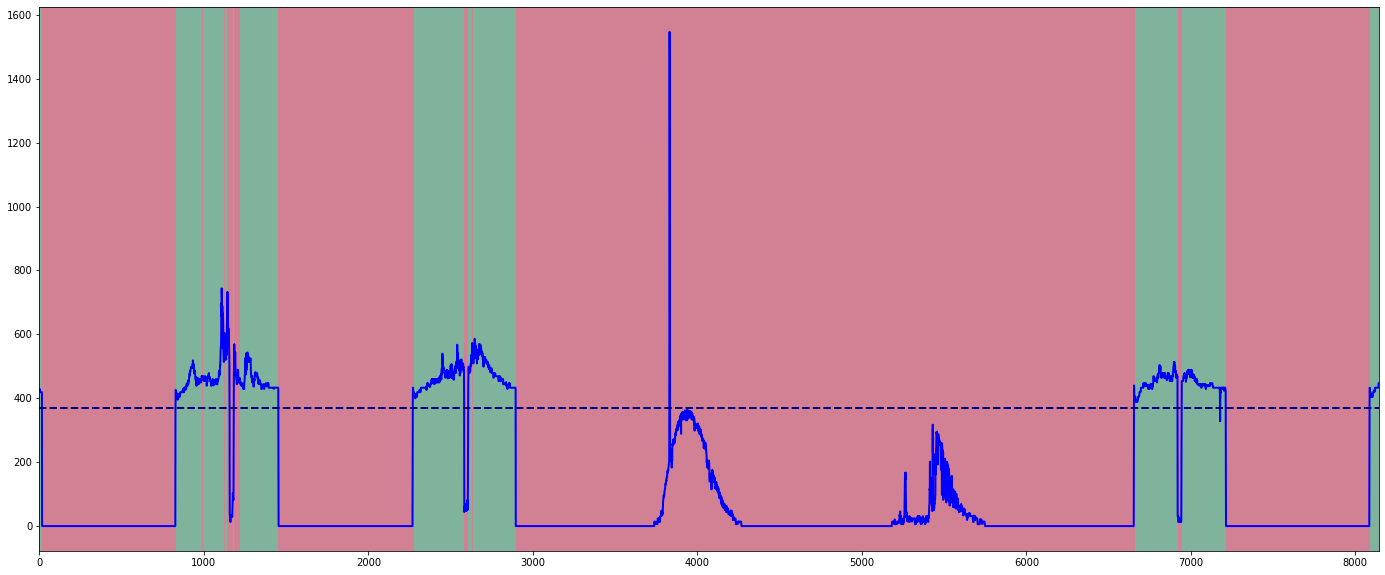

In [28]:
#df['Light'].plot(subplots=True, kind='line', linewidth=2, figsize=(24,10), color='red')
#plt.plot([0, 8200], [350, 350], color='navy', lw=2, linestyle='--')
ax = df['Light'].plot(figsize=(24,10), linewidth=2, color='blue')
ax.pcolorfast(ax.get_xlim(), ax.get_ylim(),
              df['Occupancy'].values[np.newaxis],
              cmap='RdYlGn', alpha=0.5)
plt.plot([0, 8200], [370, 370], color='navy', lw=2, linestyle='--')
plt.show()

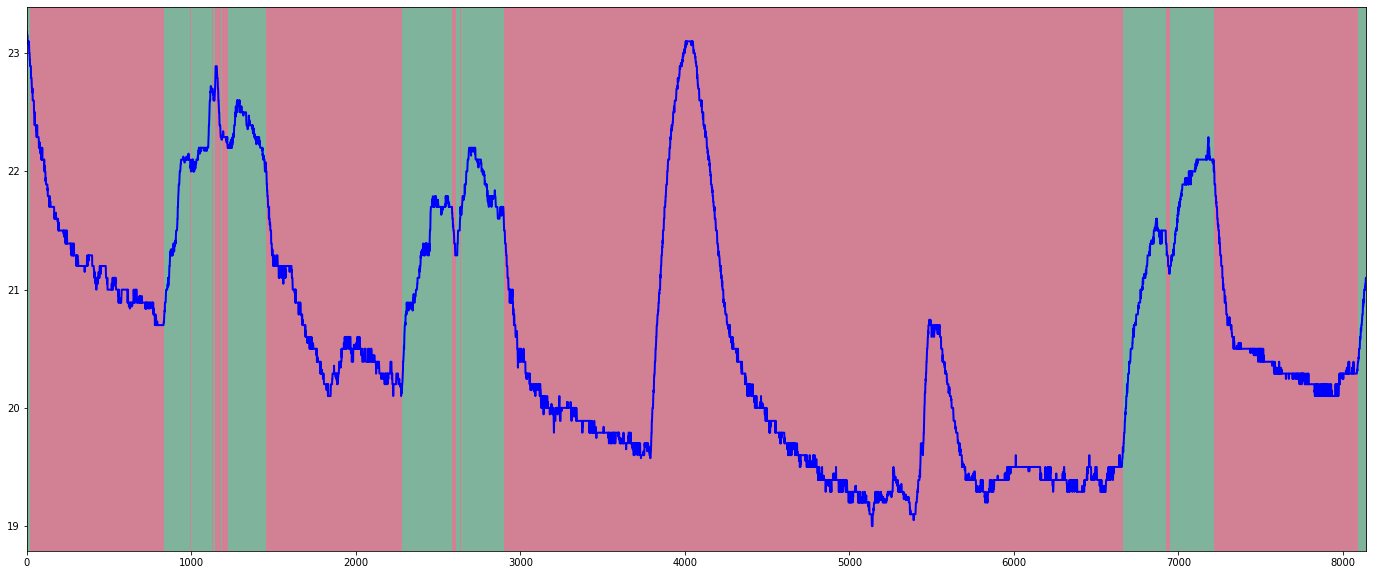

In [29]:
ax = df['Temperature'].plot(figsize=(24,10), linewidth=2, color='blue')
ax.pcolorfast(ax.get_xlim(), ax.get_ylim(),
              df['Occupancy'].values[np.newaxis],
              cmap='RdYlGn', alpha=0.5)
#plt.plot([0, 8200], [365, 365], color='navy', lw=2, linestyle='--')
plt.show()

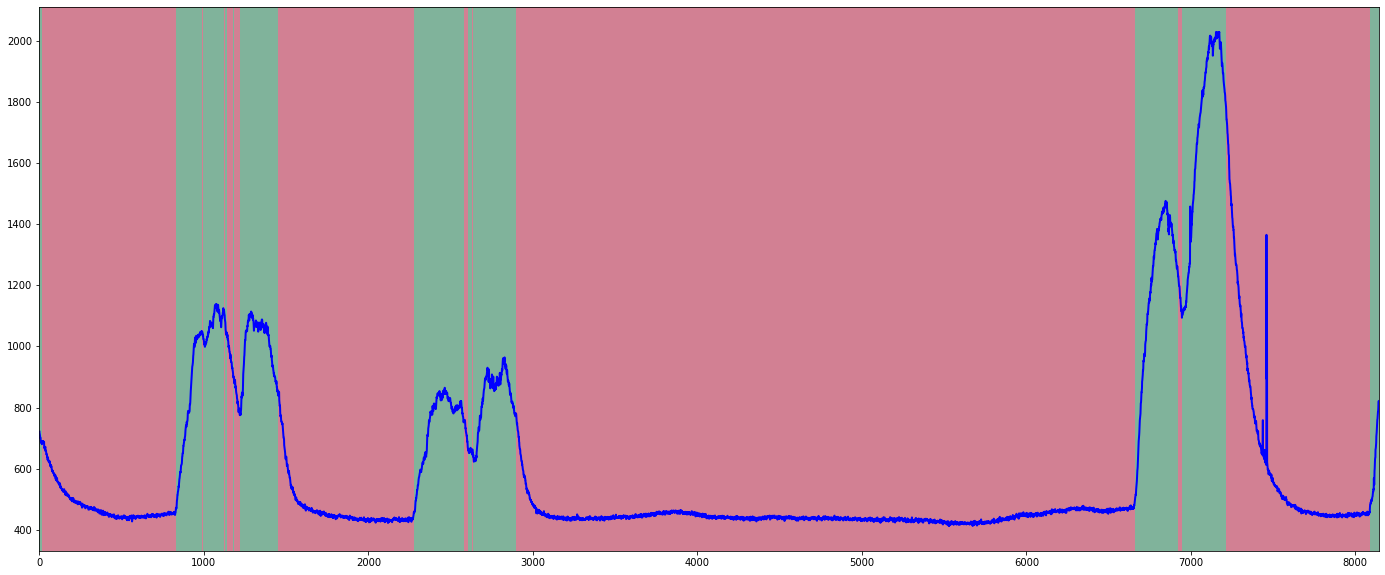

In [30]:
ax = df['CO2'].plot(figsize=(24,10), linewidth=2, color='blue')
ax.pcolorfast(ax.get_xlim(), ax.get_ylim(),
              df['Occupancy'].values[np.newaxis],
              cmap='RdYlGn', alpha=0.5)
#plt.plot([0, 8200], [365, 365], color='navy', lw=2, linestyle='--')
plt.show()

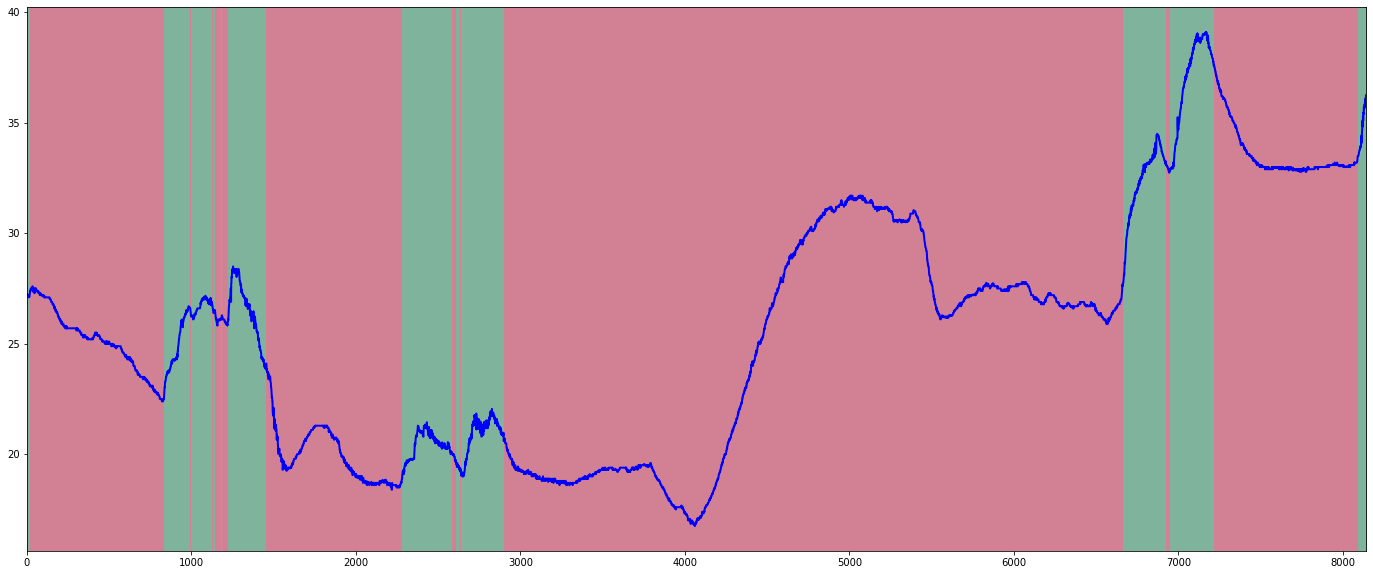

In [31]:
ax = df['Humidity'].plot(figsize=(24,10), linewidth=2, color='blue')
ax.pcolorfast(ax.get_xlim(), ax.get_ylim(),
              df['Occupancy'].values[np.newaxis],
              cmap='RdYlGn', alpha=0.5)
#plt.plot([0, 8200], [365, 365], color='navy', lw=2, linestyle='--')
plt.show()

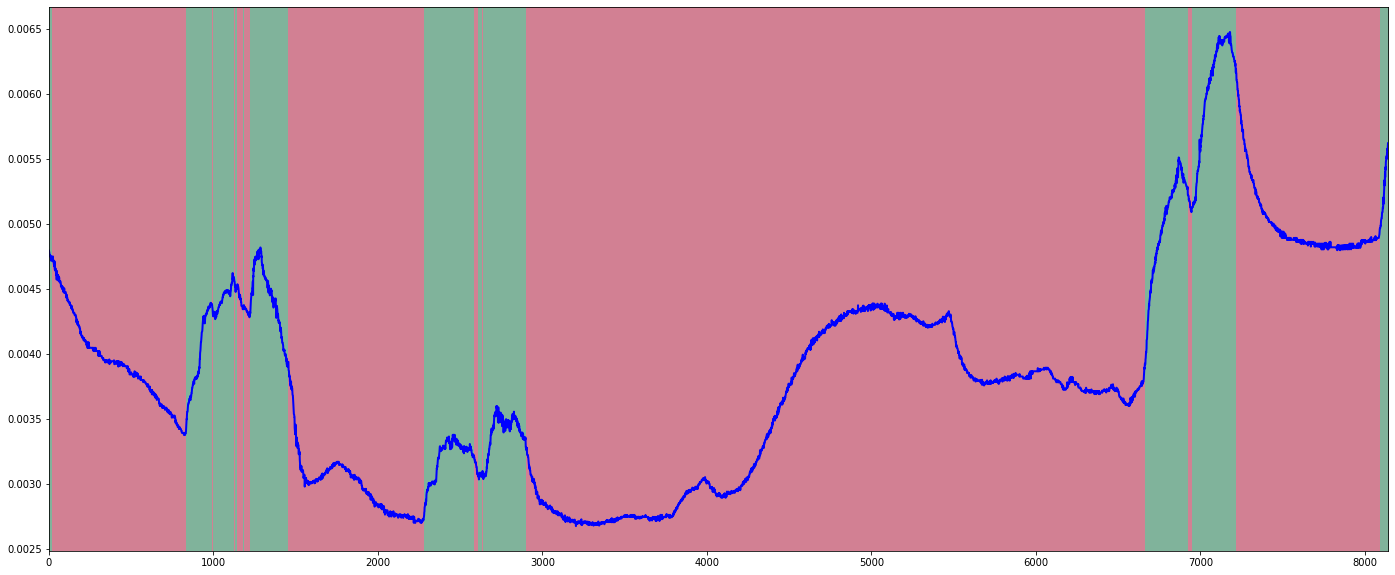

In [34]:
ax = df['HumidityRatio'].plot(figsize=(24,10), linewidth=2, color='blue')
ax.pcolorfast(ax.get_xlim(), ax.get_ylim(),
              df['Occupancy'].values[np.newaxis],
              cmap='RdYlGn', alpha=0.5)
#plt.plot([0, 8200], [365, 365], color='navy', lw=2, linestyle='--')
plt.show()